# Credit Card Fraud Analysis

### An analysis of fraudluent credit transactions and utilization for predictive modeling
### Project 1 - ITSC 3162

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Data Pre-Processing

### Below is the primary dataset for Fraudulent Transactions

In [3]:
# Loading the data
## Takes a LONG time to run -- approx 19 seconds for 2GB dataset 
cc_ibm_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/credit_card_transactions-ibm_v2.csv')


In [4]:
cc_ibm_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [5]:

cc_ibm_data.describe()


,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


In [6]:
cc_ibm_data.shape

(24386900, 15)

### Below are additional datasets with disticnt details on the cards themselves, and cardholder demographics
### (may or may not be used in modeling)

In [7]:
sd_card_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/sd254_cards.csv')
sd_user_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/sd254_users.csv')
user0_cc_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/User0_credit_card_transactions.csv')

In [8]:
## This dataset provides distinct information on the cards themselves 
sd_card_data.head()


,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [9]:
sd_card_data.shape

(6146, 13)

In [10]:
# This dataset provides distinct demographic information on the cardholders/users
sd_user_data.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [11]:
sd_user_data.shape

(2000, 18)

In [12]:
sd_user_data.isnull()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## Based on the analysis and association of the User and Card Datasets, People are charactertized as 'Users' with a total population of 2000 (0-1999)

### By creating this a column 'Users' in the User dataset, we can join IBM fraud Data and User dataset tables on the common field 'User'

### User and IBM Fraud dataset can be joined with one another to make a more balanced and descriptive dataset




In [13]:
#creating 'User' field
user = []

for i in range (2000):
    user.append(i)
    


sd_user_data['User'] = user 



In [14]:
sd_user_data.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,User
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5,1
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5,2
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4,3
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1,4


In [15]:
#joining ibm fraud dataset with user data

left_df = cc_ibm_data
right_df = sd_user_data

ibm_user_df = left_df.merge(right_df, on = 'User', how = 'left')

ibm_user_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5


In [16]:
ibm_user_df.isna().sum()


User                                  0
Card                                  0
Year                                  0
Month                                 0
Day                                   0
Time                                  0
Amount                                0
Use Chip                              0
Merchant Name                         0
Merchant City                         0
Merchant State                  2720821
Zip                             2878135
MCC                                   0
Errors?                        23998469
Is Fraud?                             0
Person                                0
Current Age                           0
Retirement Age                        0
Birth Year                            0
Birth Month                           0
Gender                                0
Address                               0
Apartment                      17762699
City                                  0
State                                 0


In [17]:
ibm_user_df.isnull()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24386896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24386897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24386898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data Exploration/Visualization

In [18]:
ibm_user_df.dtypes

User                             int64
Card                             int64
Year                             int64
Month                            int64
Day                              int64
Time                            object
Amount                          object
Use Chip                        object
Merchant Name                    int64
Merchant City                   object
Merchant State                  object
Zip                            float64
MCC                              int64
Errors?                         object
Is Fraud?                       object
Person                          object
Current Age                      int64
Retirement Age                   int64
Birth Year                       int64
Birth Month                      int64
Gender                          object
Address                         object
Apartment                      float64
City                            object
State                           object
Zipcode                  

### Which features do you think will be most useful for predicting/classifying the target value?
### Fraud vs No Fraud


In [19]:
ibm_user_df['Is Fraud?'].value_counts()

No     24357143
Yes       29757
Name: Is Fraud?, dtype: int64

In [51]:
sns.countplot

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

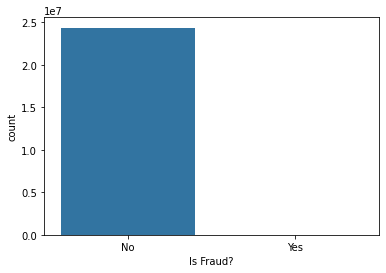

In [20]:
ax = sns.countplot( x= 'Is Fraud?', data = ibm_user_df)

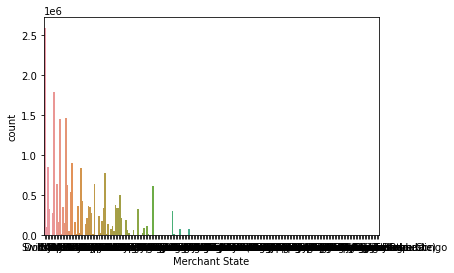

In [53]:
ax = sns.countplot( x= 'Merchant State', data = ibm_user_df)

## How can we make the X -axis variables more clear??

## Change state attribute to postal codes

## Set rotate parameter in seaborn 

## Change font size in seaborn 

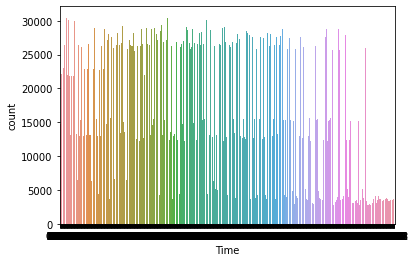

In [54]:
ax = sns.countplot( x= 'Time', data = ibm_user_df)

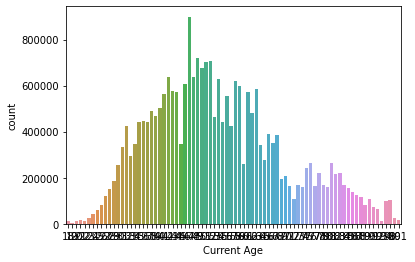

In [55]:
ax = sns.countplot( x= 'Current Age', data = ibm_user_df)

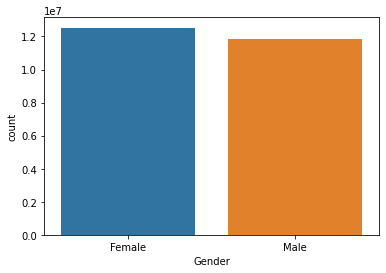

In [56]:
ax = sns.countplot( x= 'Gender', data = ibm_user_df)

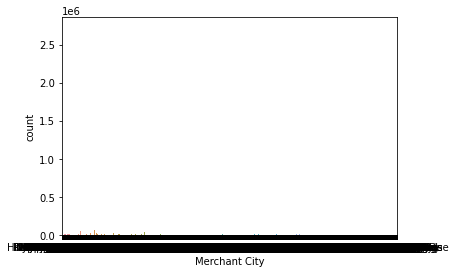

In [57]:
ax = sns.countplot( x= 'Merchant City', data = ibm_user_df)

### Subsetting Data to only fraudulent transactions to see if there are any trends

In [21]:
ibm_user_df.rename(columns = {'Is Fraud?':'Fraud'}, inplace = True)



In [26]:
is_fraud = ibm_user_df.Fraud == "Yes"

filters = is_fraud

is_fraud_df = ibm_user_df[filters]

is_fraud_df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
4099,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4100,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4101,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4102,0,0,2015,11,16,09:46,$248.36,Online Transaction,4872340518840476610,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4103,0,0,2015,11,16,11:20,$473.00,Online Transaction,-8566951830324093739,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24375668,1997,2,2016,9,4,10:45,$1.25,Online Transaction,6455213054093379528,ONLINE,...,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
24375670,1997,2,2016,9,4,12:30,$116.66,Online Transaction,822647939787511611,ONLINE,...,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
24375671,1997,2,2016,9,4,12:40,$359.99,Online Transaction,8080934608468946743,ONLINE,...,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
24375672,1997,2,2016,9,4,13:45,$351.51,Online Transaction,-4282466774399734331,ONLINE,...,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3


<AxesSubplot:xlabel='FICO Score', ylabel='Fraud'>

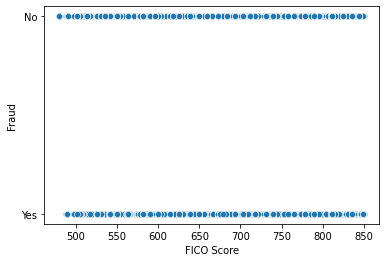

In [55]:
sns.scatterplot(data=ibm_user_df, x="FICO Score", y="Fraud")

<AxesSubplot:xlabel='Year', ylabel='Fraud'>

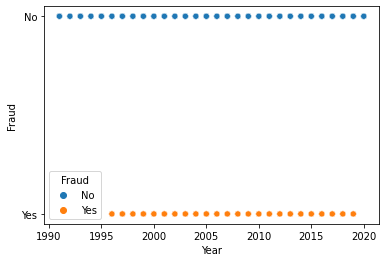

In [49]:
## Plotting Year and Fraud
sns.scatterplot(data=ibm_user_df, x="Year", y="Fraud", hue = "Fruad")

### Correlation - We need some measure of association since our data is categorical 

     Cramer's V is one way to measure association between categorical (discrete) variables

### Label Encoding - Helps transform categorical variables into numerical variables

In [59]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in ibm_user_df.columns:
    ibm_user_df[col] = enc.fit(ibm_user_df[col]).transform(ibm_user_df[col])

## Conclusion, (thus far)

After analyzing the distribution of certain attributes, it would be interesting to see in
in further evaluation if these attributes have any association with the target variable 'Is_Fraud'
and assist in identifying if a transaction would be fraudulent.